# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print(df_raw.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [5]:
print(df_raw.count())
print(len(df_raw))

admit       400
gre         398
gpa         398
prestige    399
dtype: int64
400


Answer: 400.

#### Question 2. Create a summary table

In [6]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [7]:
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because GRE has a much wider range of values (220-800) than GPA (2.26-4.00).

#### Question 4. Drop data points with missing data


In [26]:
df_raw.dropna(axis=0, how='any', inplace=True)

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [30]:
print(df_raw['admit'].isnull().sum())
print(df_raw['gre'].isnull().sum())
print(df_raw['gpa'].isnull().sum())
print(df_raw['prestige'].isnull().sum())

0
0
0
0


Answer: Count missing values in each column, confirm all are zero.

#### Question 6. Create box plots for GRE and GPA

{'boxes': [<matplotlib.lines.Line2D at 0x22bae7bbbe0>],
 'caps': [<matplotlib.lines.Line2D at 0x22bae7cdf60>,
 'fliers': [<matplotlib.lines.Line2D at 0x22bae7e0e80>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x22bae7d7fd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x22ba6ef3208>,
  <matplotlib.lines.Line2D at 0x22bae7cdda0>]}

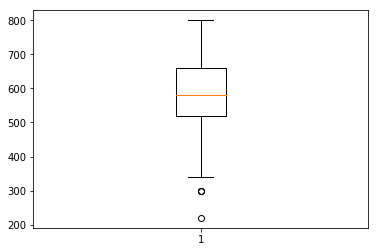

In [31]:
plt.boxplot(df_raw['gre'])

{'boxes': [<matplotlib.lines.Line2D at 0x22bae893b38>],
 'caps': [<matplotlib.lines.Line2D at 0x22bae89eeb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x22bae8addd8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x22bae8a5f28>],
 'whiskers': [<matplotlib.lines.Line2D at 0x22bae893cf8>,
  <matplotlib.lines.Line2D at 0x22bae89ecf8>]}

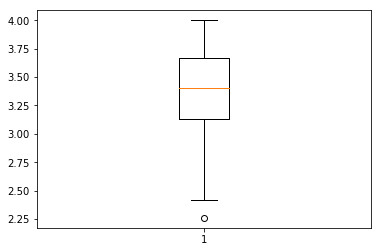

In [32]:
plt.boxplot(df_raw['gpa'])

#### Question 7. What do this plots show?

Answer: Both distributions show an outlier or two.
        The distribution of GPA is flatter and less skewed than that of GRE, it appears.

#### Question 8. Describe each distribution 

In [39]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


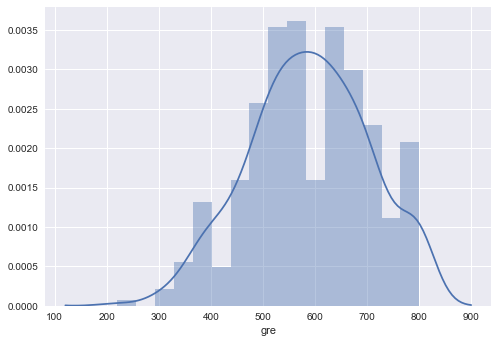

In [40]:
sns.distplot(df_raw.gre)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


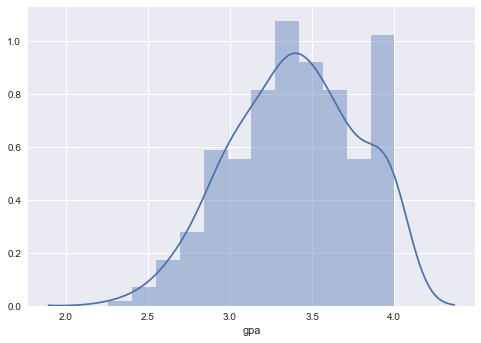

In [41]:
sns.distplot(df_raw.gpa)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Not for GRE or GPA.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: I have no idea how to evaluate that.

#### Question 11. Which of our variables are potentially colinear? 

In [42]:
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: The strongest correlation between *admit* and any other variable seems to be with *prestige*. The correlation is negative because for *prestige*, lower values represent better schools.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Plot the two variables against each other, and perform some linear regression analysis to further verify the existence and strength of the correlation.

#### Question 14. What is your hypothesis? 

Answer: The null hypothesis is that there is no association between *admit* and *prestige*. The alternative hypothesis is that there is a negative correlation between them (as *prestige* gets lower, indicating better schools, *admit* becomes more likely to be true).

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data